<a href="https://colab.research.google.com/github/mariusblarsen/ae-attack-pipeline/blob/SAA-attack/SAA_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Generate adversarial example

## Sparse-Adversarial-Attack

In [1]:
!git clone https://github.com/mariusblarsen/ae-attack-pipeline

Cloning into 'ae-attack-pipeline'...
remote: Enumerating objects: 1501, done.
remote: Counting objects: 100% (1501/1501), done.
remote: Compressing objects: 100% (959/959), done.
remote: Total 1501 (delta 531), reused 1489 (delta 521), pack-reused 0
Receiving objects: 100% (1501/1501), 15.07 MiB | 25.18 MiB/s, done.
Resolving deltas: 100% (531/531), done.


In [2]:
%cd ae-attack-pipeline

/content/ae-attack-pipeline


In [ ]:
!git pull origin SAA-attack

In [4]:
!git checkout -b SAA-attack

Switched to a new branch 'SAA-attack'


In [27]:
!pip install -r Tianchi04/requirements.txt

  Using cached mmdet-2.17.0-py3-none-any.whl (1.2 MB)
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=19b35d19a065371449b3b71cdbcc83b5893951aa7ed8ff77e542b25c2cb63826
  Stored in directory: /root/.cache/pip/wheels/ba/ad/c8/2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built terminaltables


### Fetch checkpoints folder from gdrive

In [19]:
# Replace path to where the checkpoint files folder is
%cd gdrive/MyDrive/Studie/Prosjekttoppgave/

/content/gdrive/MyDrive/Studie/Prosjekttoppgave


In [20]:
%cp -av Colab\ assets checkpoints

'Colab assets' -> 'checkpoints'
'Colab assets/yolov4.cfg' -> 'checkpoints/yolov4.cfg'
'Colab assets/yolov4.weights' -> 'checkpoints/yolov4.weights'
'Colab assets/yolov4.pth' -> 'checkpoints/yolov4.pth'
'Colab assets/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth' -> 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'


In [21]:
%mv checkpoints ../../../../ae-attack-pipeline/Tianchi04/

In [22]:
%cd ../../../../ae-attack-pipeline/Tianchi04/
!ls checkpoints

/content/ae-attack-pipeline/Tianchi04
faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth  yolov4.pth
yolov4.cfg					   yolov4.weights


In [ ]:
!rm -rf ./select1000_new_p/.ipynb_checkpoints/

In [24]:
!pip install mmcv-full

     |████████████████████████████████| 324 kB 5.4 MB/s 
  Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
     |████████████████████████████████| 185 kB 39.3 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.14-cp37-cp37m-linux_x86_64.whl size=31430426 sha256=e062cfc2040e1495b59ff3e64a63cb0067ae880ceb71325c262f9ba873abcf58
  Stored in directory: /root/.cache/pip/wheels/5e/54/62/69c99dc3c9937bca64126f81cbe315ae6c8e6e98c43fa7392d
Successfully built mmcv-full


In [28]:
!python eval.py

100% 1/1 [00:14<00:00, 14.64s/it]
convolution havn't activate linear
convolution havn't activate linear
convolution havn't activate linear
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100% 1/1 [00:00<00:00,  1.50it/s]
Overall score:  0.0
Saving into whitebox_yolo_overall_score.json...
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-pac

In [ ]:
!rm -rf ../images/.ipynb_checkpoints/

In [83]:
!python attack_3.py

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
2.jpg 2483
/usr/local/lib/python3.7/dist-packages/mmdet/apis/inference.py:73: UserWarning: `LoadImage` is deprecated and will be removed in future releases. You may use `LoadImageFromWebcam` from `mmdet.datasets.pipelines.` instead.
  warnings.warn('`LoadImage` is deprecated and will be removed in '
/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs

# MMDet test

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


[[152.05289   148.04247   280.15134   526.0088      0.9883767]]
[[1.4117232e+02 3.2593484e+02 4.1538409e+02 6.1371307e+02 8.0871224e-01]
 [1.5496416e+02 3.4708942e+02 3.1970584e+02 5.6864124e+02 2.2495779e-01]
 [2.4678474e+02 2.9970755e+02 4.1772717e+02 5.6769385e+02 5.7030454e-02]]
[[1.20756905e+02 2.97373596e+02 4.22343201e+02 6.18456421e+02
  4.88582104e-01]
 [1.52393784e+02 3.07954773e+02 2.93448334e+02 5.62318115e+02
  4.19506997e-01]
 [2.23549301e+02 3.63177185e+02 2.91379150e+02 5.46214294e+02
  1.09144680e-01]]
[[257.66632   293.4939    395.42593   398.32794     0.7988676]]


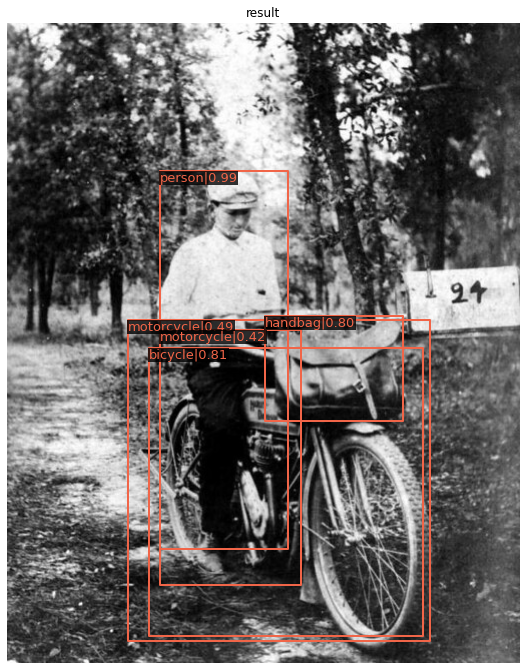

In [84]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import mmcv
import numpy as np
# Choose to use a config and initialize the detector
config = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# Setup a checkpoint file to load
checkpoint = './checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

# Use the detector to do inference
img = '../images/2.jpg'
result = inference_detector(model, img)
for res in result:
  if res.any():
    if res[0][4] > 0.3:
      print(res)


show_result_pyplot(model, img, result, score_thr=0.3)